# 🛍️ E-commerce Sales Analysis Project

This notebook presents a seasonal breakdown of category-level sales performance based on one year of e-commerce sales data from Trendyol. It focuses on identifying top-performing categories and product patterns across winter, spring, summer, and autumn seasons.

### 🔬 Hypothesis Formulation

- **𝐻₀ (Null Hypothesis):**  
  Product sales quantities do **not** significantly differ between seasons.

- **𝐻ₐ (Alternative Hypothesis):**  
  Product sales quantities **do** significantly differ between at least two seasons.


## 🔍 Objective
- Identify the most sold categories by season.
- Visualize and compare category-level trends across different times of the year.
- Support data-driven business decisions regarding stock, pricing, and campaigns.


## 📦 Dataset Description
The dataset is composed of monthly product-based sales reports with the following key columns:

- `Urun Ad`: Product name
- `Kategori`: Product category
- `Net Sats Adedi`: Quantity sold
- `Net Ciro`: Net revenue
- `MevsimKodu`: Season code (K, I, Y, S)

## 📚 Necessary Imports
These are the libraries used in this notebook for data handling and visualization:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## 📥 Data Loading and Preprocessing

### 1. Load All Monthly Files and Add Season Column  
We load all monthly product-based Excel files and label each row with a corresponding season code.


In [ ]:
import pandas as pd
import glob

# Load all cleaned product-based Excel files
file_paths = sorted(glob.glob("UrunBazli_*_Temizlenmis_FinalTemiz.xlsx"))
all_data = []

# Map month codes to season labels
season_map = {
    "01": "K", "02": "K", "12": "K",
    "03": "I", "04": "I", "05": "I",
    "06": "Y", "07": "Y", "08": "Y",
    "09": "S", "10": "S", "11": "S"
}

# Read each file and assign season
for path in file_paths:
    df = pd.read_excel(path)
    month_code = path.split("_")[1][:2]
    df["MevsimKodu"] = season_map.get(month_code, "Unknown")
    all_data.append(df)

# Combine all into one DataFrame
all_months_df = pd.concat(all_data, ignore_index=True)
all_months_df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 Analysis – Full Year Sales Trend

## 📊 Seasonal Sales Summary

### 📊 Total Sales Quantity by Season

This bar chart shows the total number of products sold in each season throughout the year 2024.

It clearly highlights which season had the highest overall product demand, making it easier to identify peak and off-peak periods for sales strategy planning.

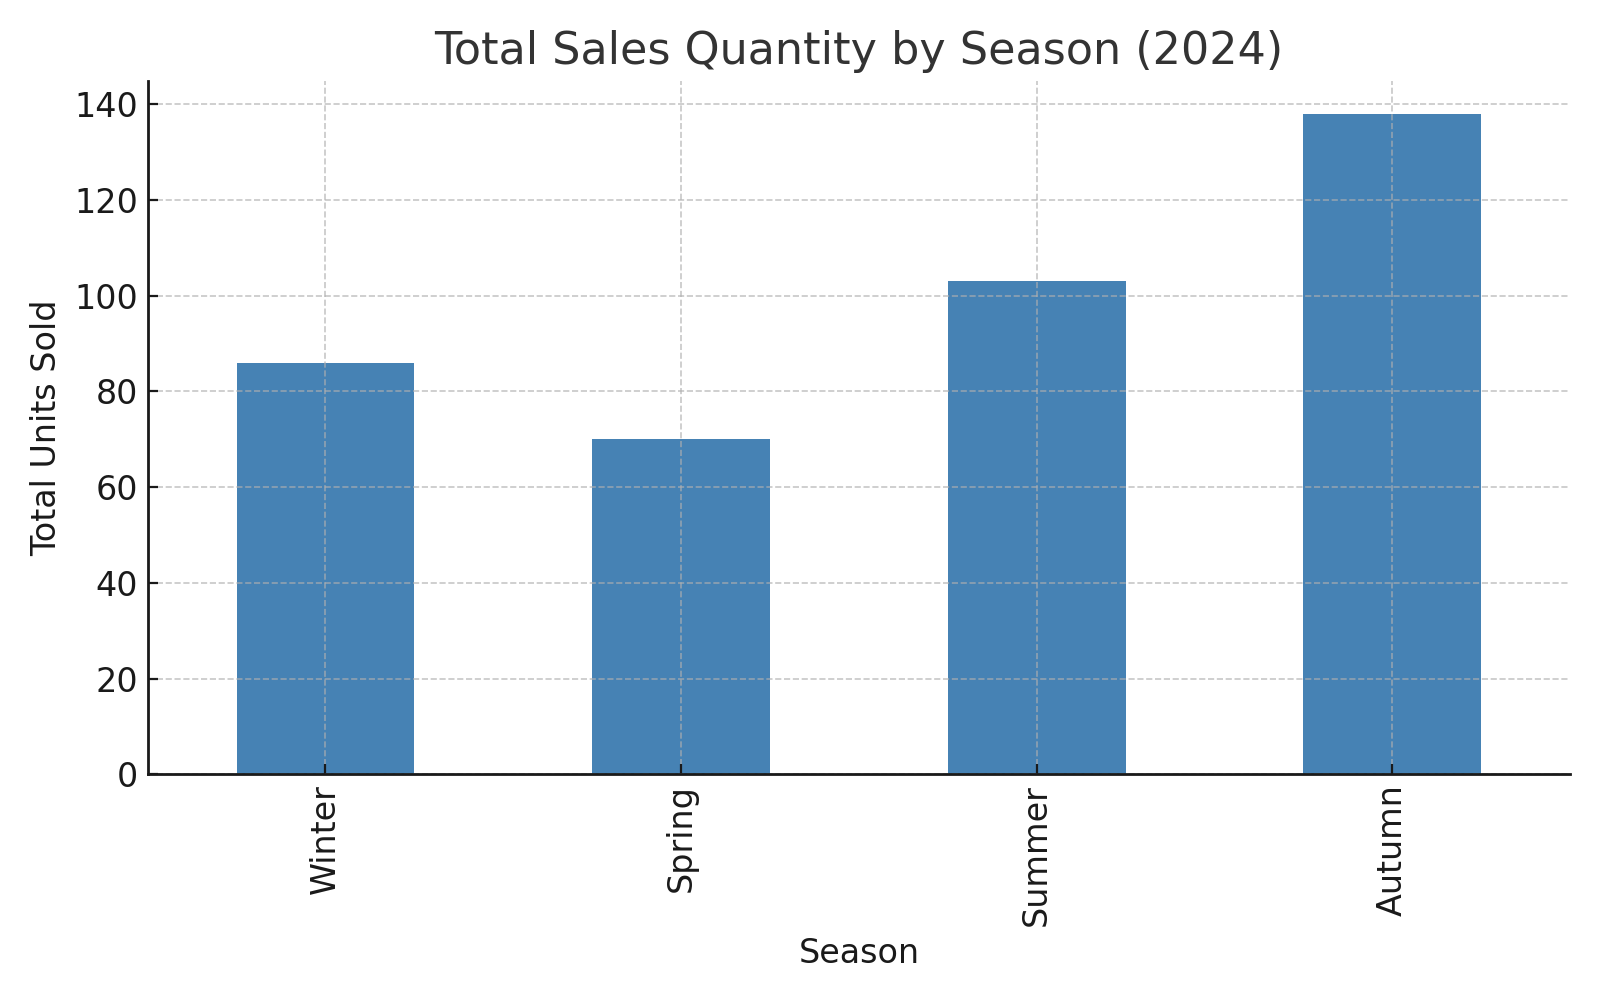

In [ ]:
season_totals = df_12ay.groupby("Mevsim")["Net Sats Adedi"].sum().reindex(["Winter", "Spring", "Summer", "Autumn"])

plt.figure(figsize=(8, 5))
season_totals.plot(kind="bar", color="steelblue")
plt.title("Total Sales Quantity by Season (2024)")
plt.ylabel("Total Units Sold")
plt.xlabel("Season")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The following chart visualizes the total number of net product sales per month for the entire year of 2024. 
It illustrates seasonal patterns and identifies months with peak and low sales activity.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate updated trend chart for full year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend_full, x="Month", y="Total_Units_Sold", marker="o", label="Trend", color="black")
plt.bar(monthly_trend_full["Month"], monthly_trend_full["Total_Units_Sold"], alpha=0.3, label="Total Sales", color="skyblue")
plt.title("Total Net Sales per Month – 2024 (Full Year)")
plt.xlabel("Month")
plt.ylabel("Total Net Sales Quantity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

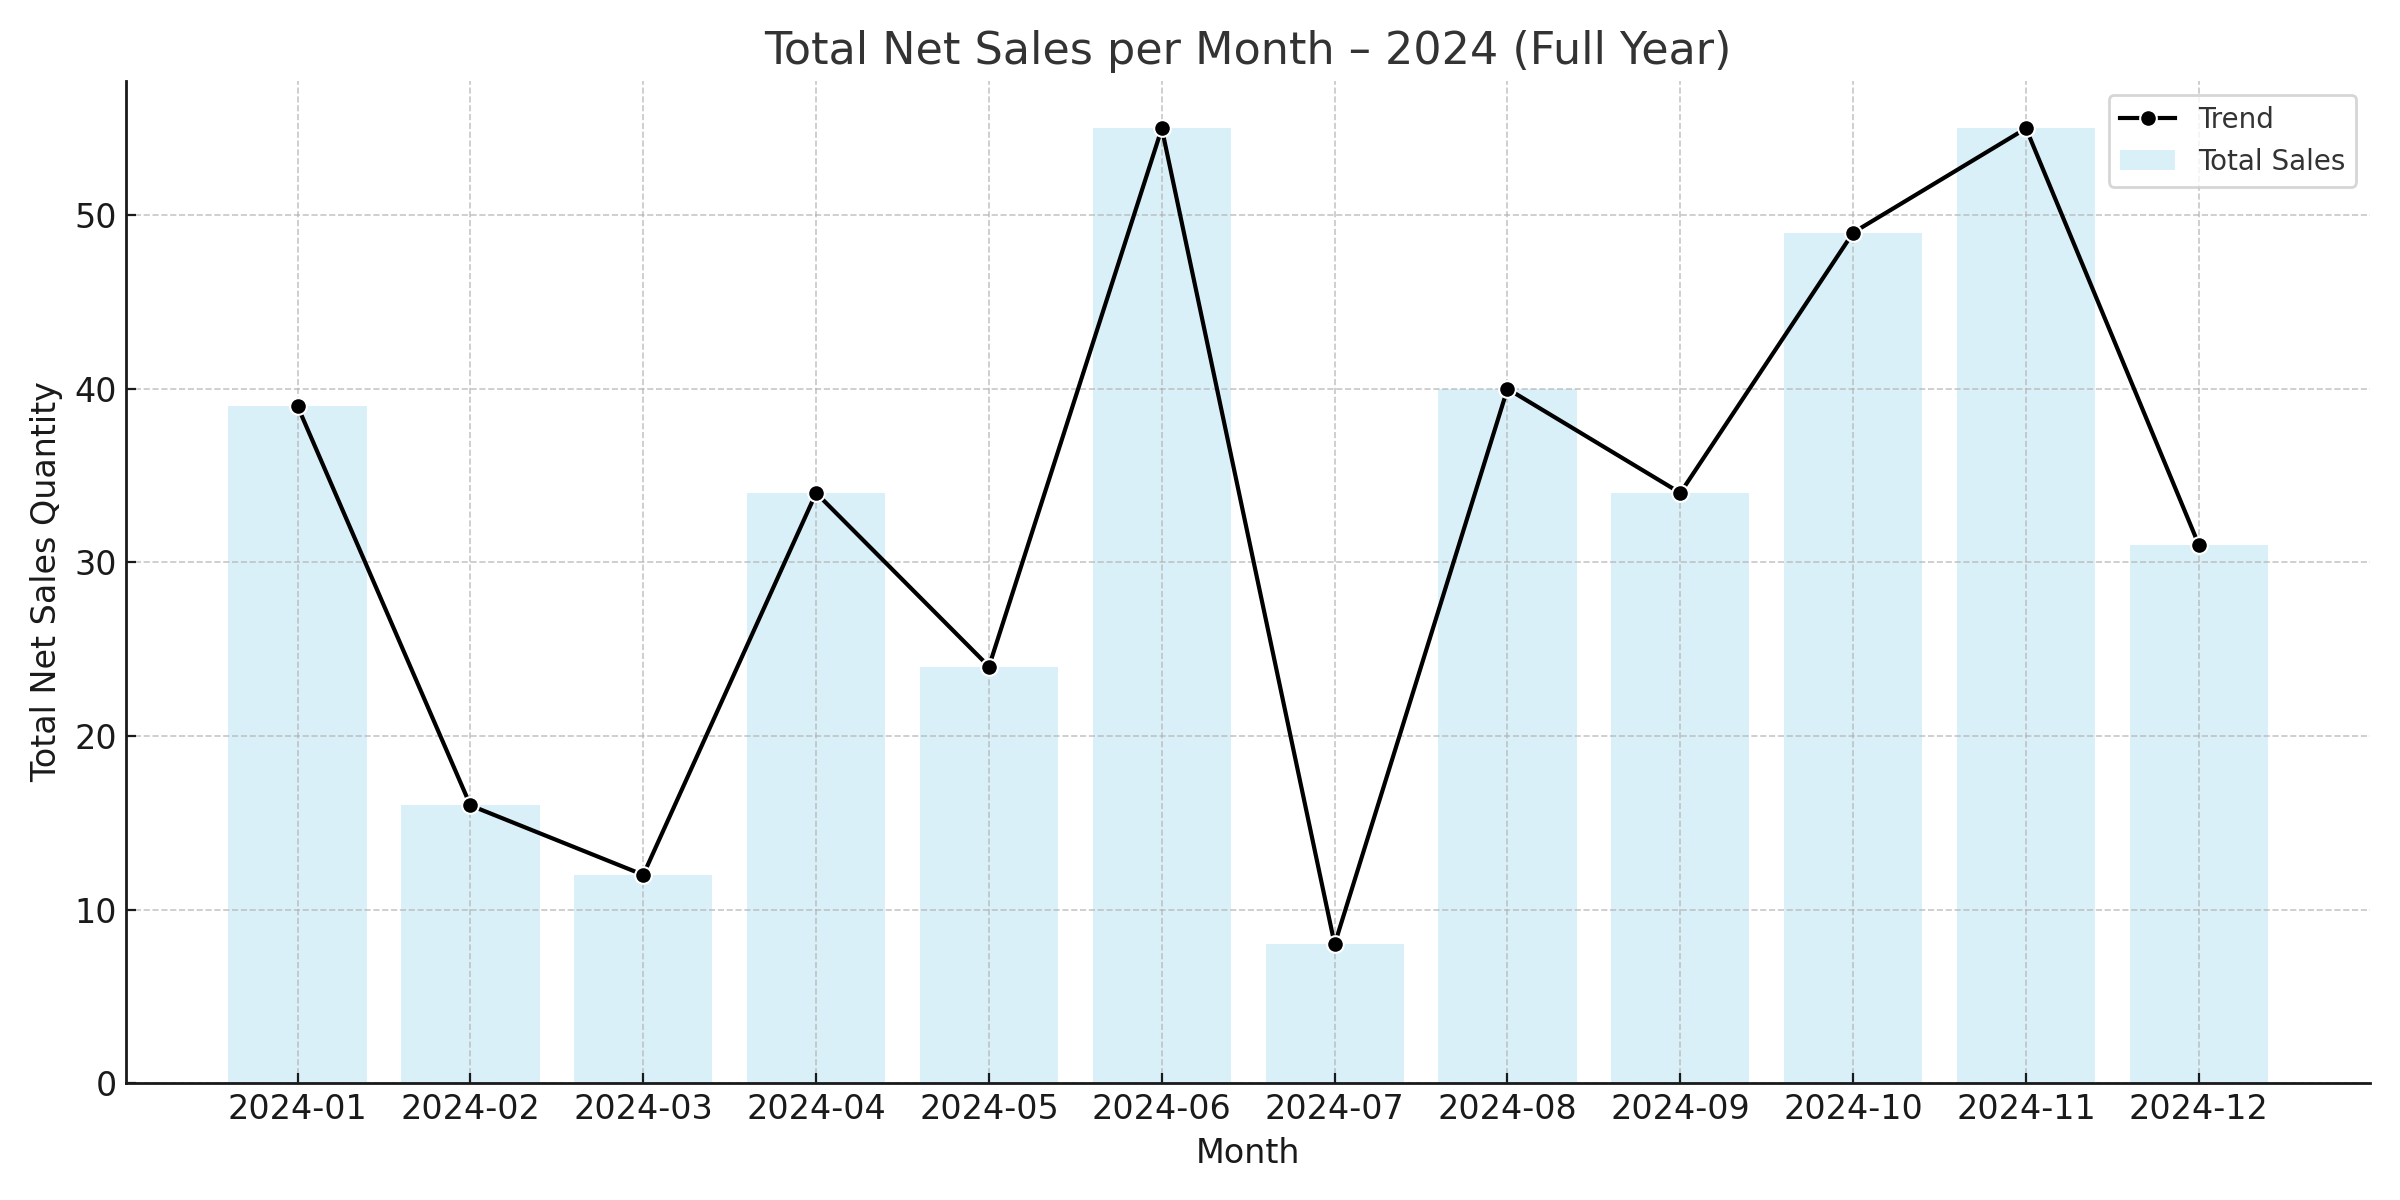

### 📈 Trend Analysis Summary (2024)

The monthly sales trend analysis for the year 2024 reveals the following:

- The total product sales in January started at **39 units**.
- By December, the monthly sales reached **31 units**.
- The trend line fitted to the data shows a slope of **1.83**, indicating a positive trend in overall sales.
- This suggests that sales increased steadily throughout the year.

- The highest number of monthly sales occurred in **June**, with **55 units** sold.
- The lowest sales were recorded in **July**, totaling **8 units**.

## 🧩 Top Categories by Sales Quantity – Seasonal Breakdown (2024)

### 🟢 Winter – Top 10 Categories by Sales

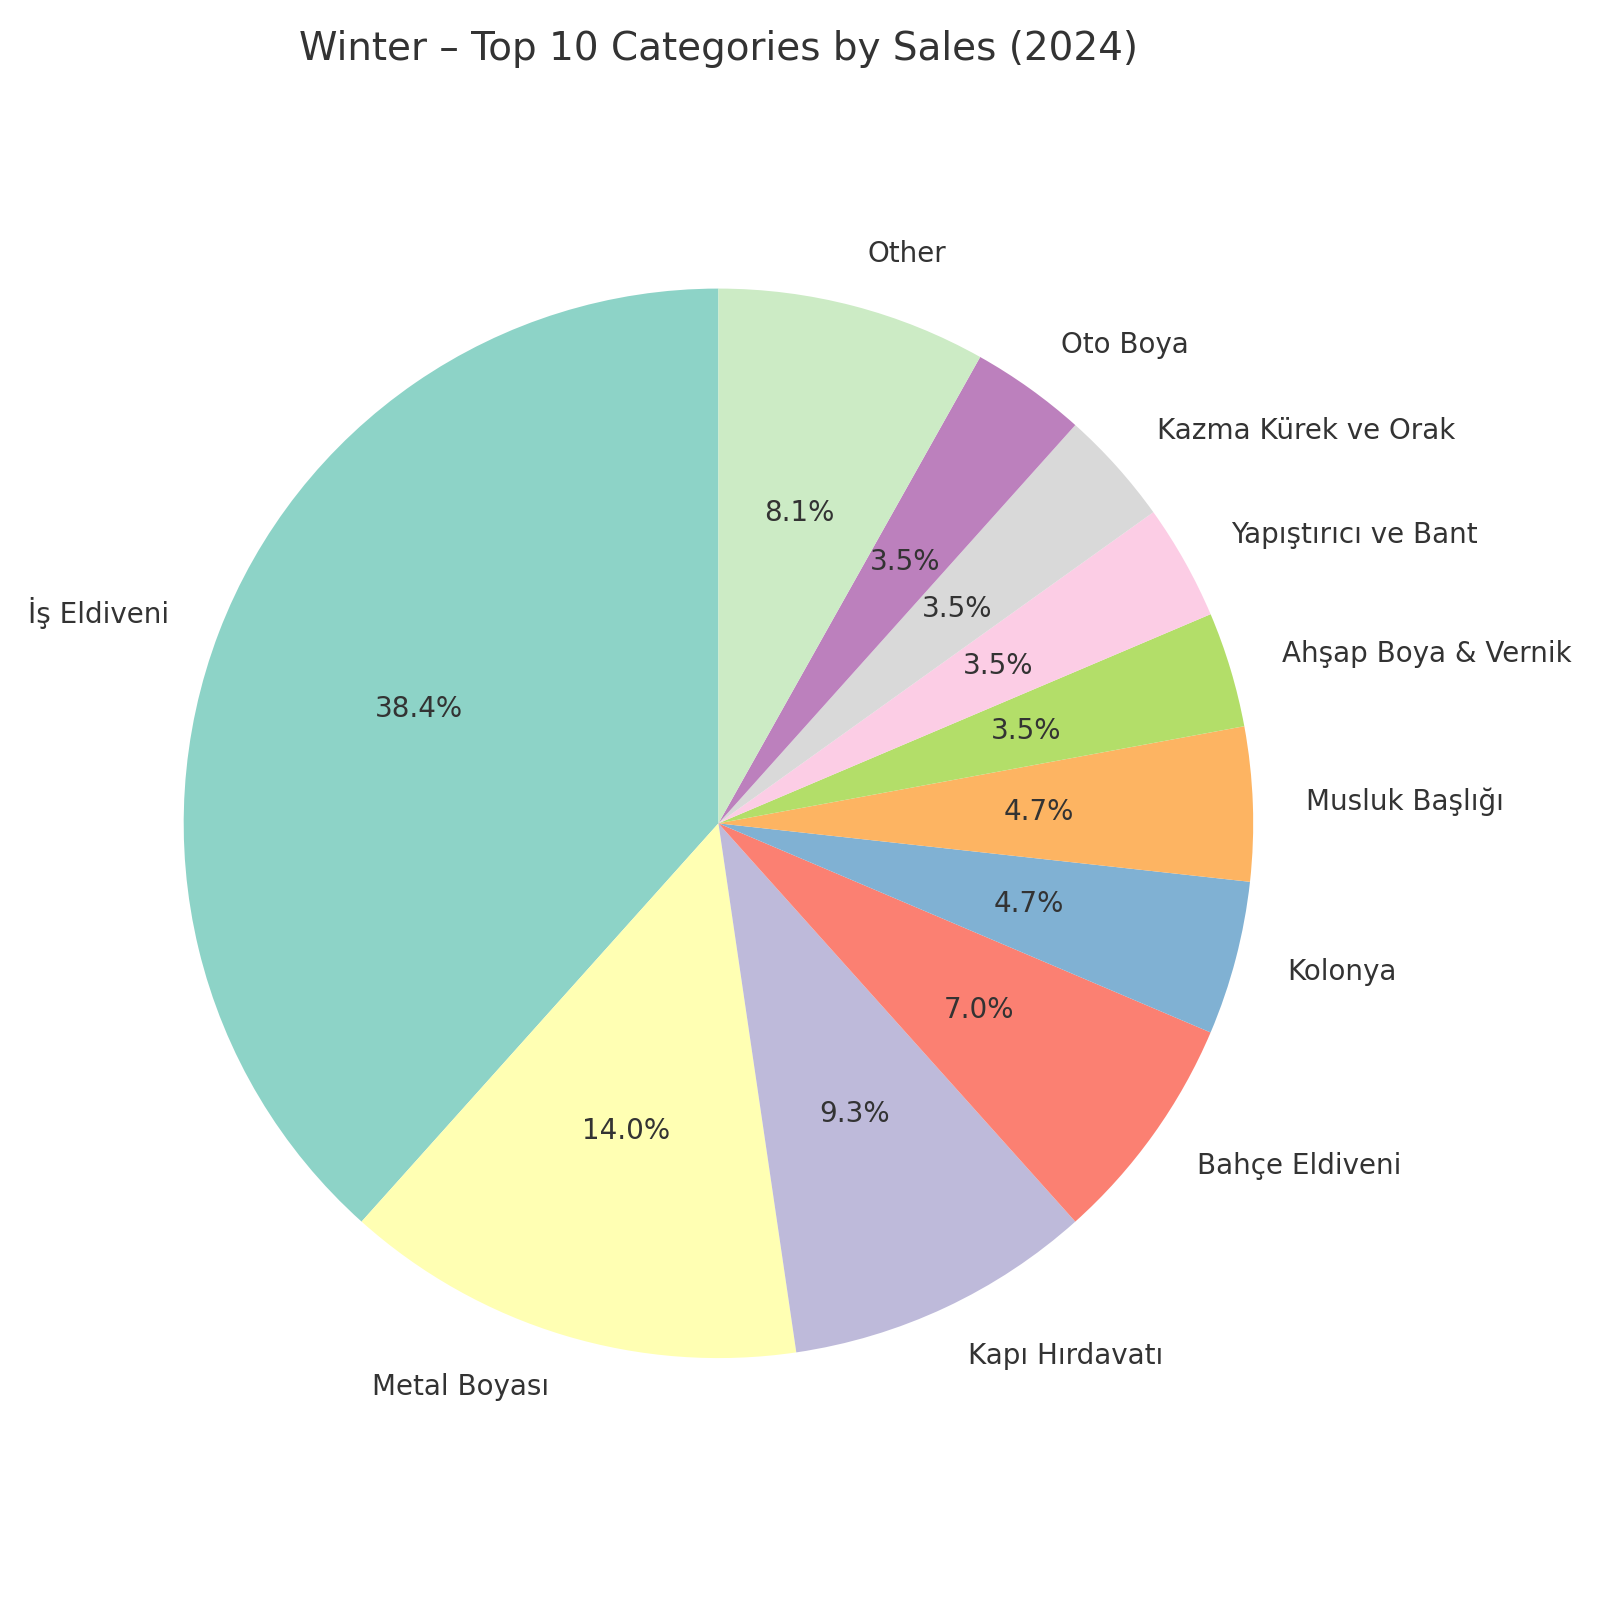

In [ ]:
df_season = df_12ay[df_12ay["Mevsim"] == "Winter"]
cat_sales = df_season.groupby("Kategori")["Net Sats Adedi"].sum().sort_values(ascending=False)

top10 = cat_sales.head(10)
other = cat_sales.iloc[10:].sum()
if other > 0:
    top10["Other"] = other

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

color_cycle = cycle(sns.color_palette("Set3") + sns.color_palette("Paired"))
colors = [next(color_cycle) for _ in range(len(top10))]

plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title("Winter – Top 10 Categories by Sales (2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()

**📝 Notes:**
- The most sold category in Winter was **İş Eldiveni** with **33 units** sold.
- The least sold category (among Top 10) was **Ahşap Boya & Vernik** with **3 units** sold.

### 🟢 Spring – Top 10 Categories by Sales

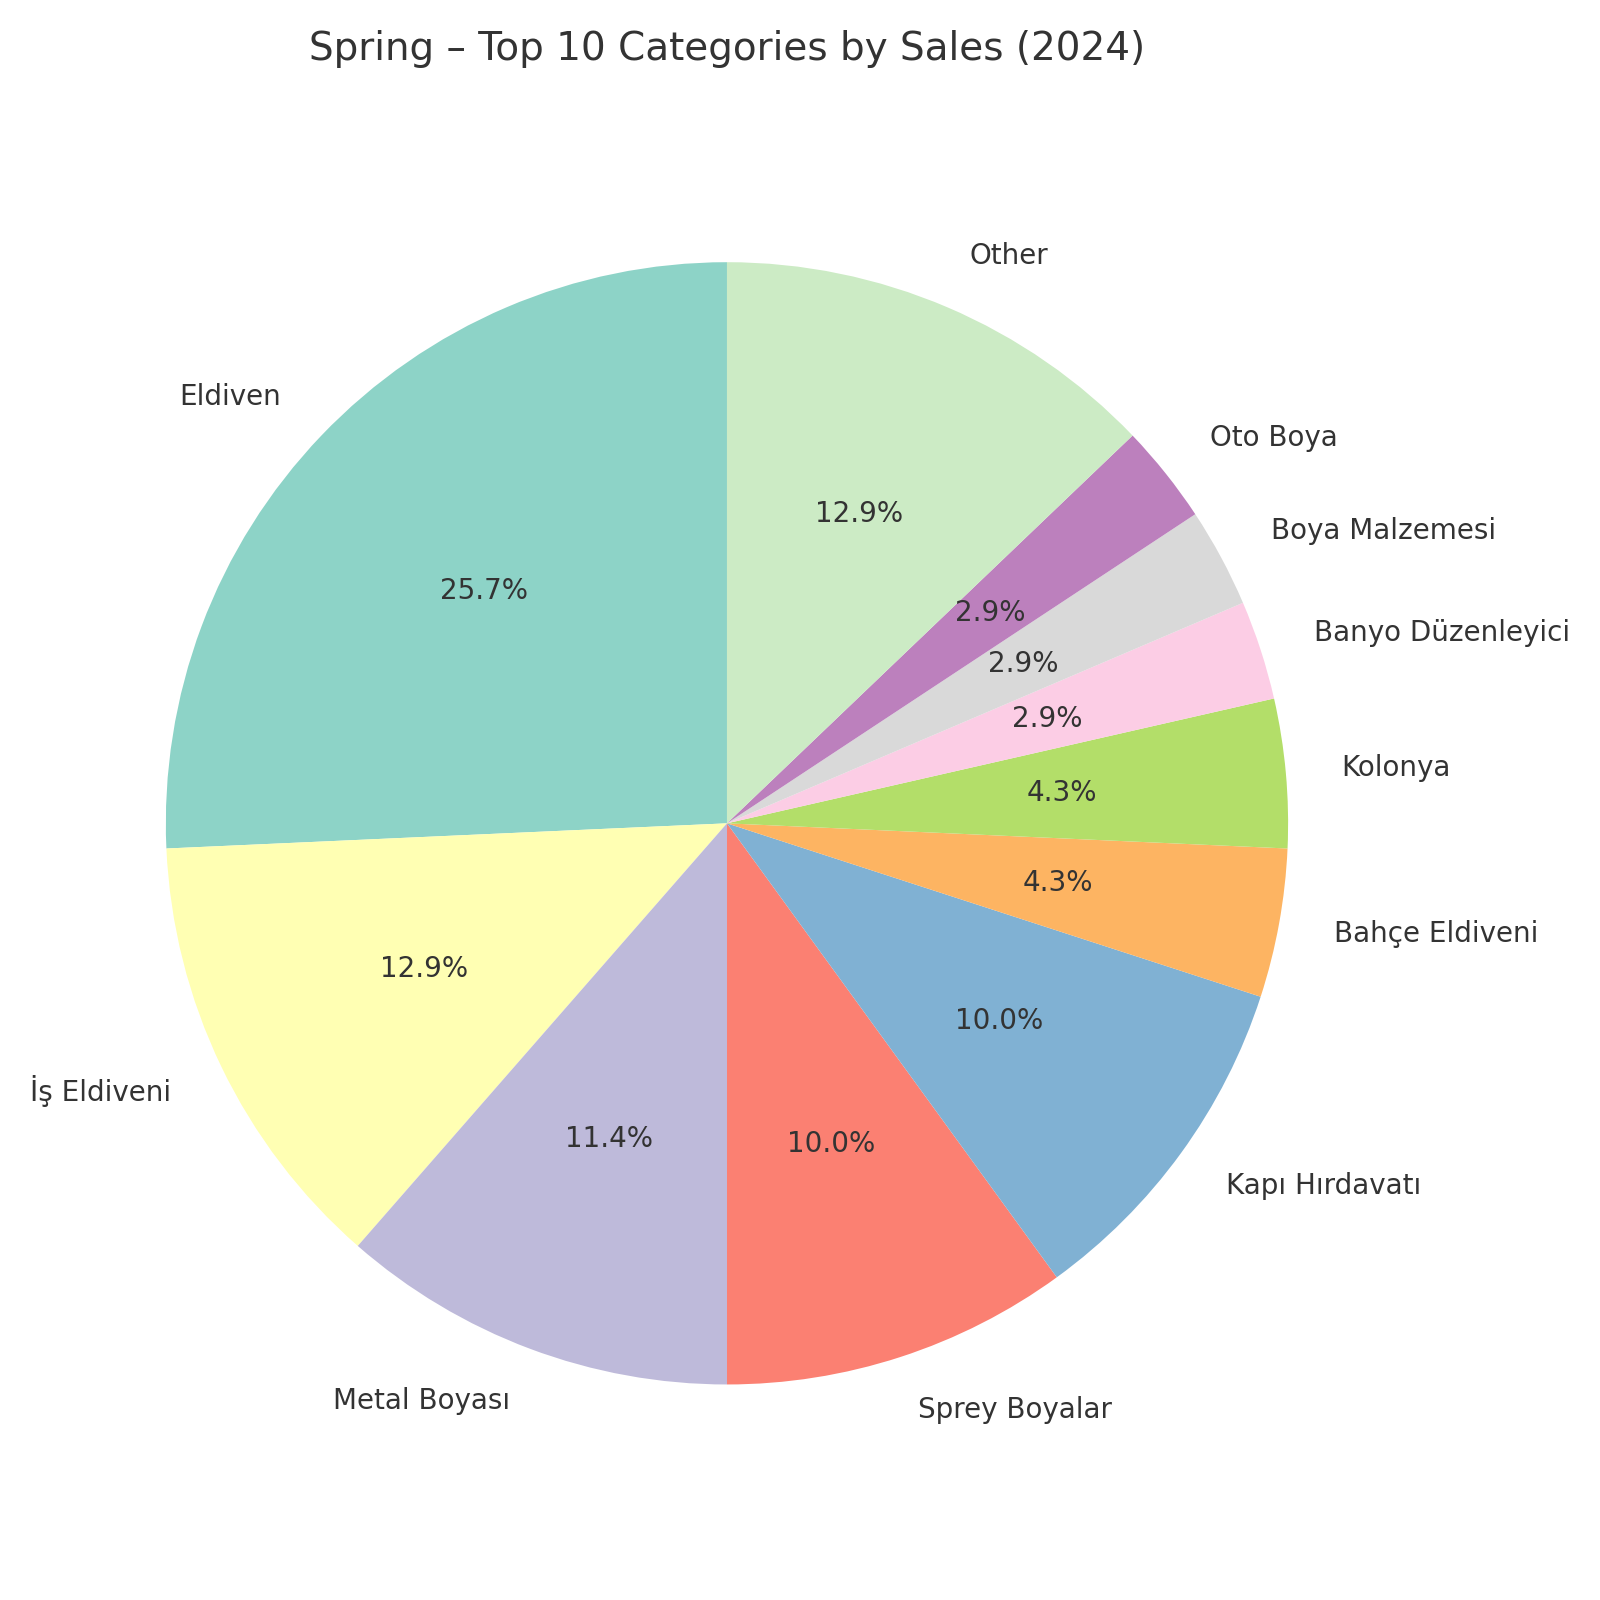

In [ ]:
df_season = df_12ay[df_12ay["Mevsim"] == "Spring"]
cat_sales = df_season.groupby("Kategori")["Net Sats Adedi"].sum().sort_values(ascending=False)

top10 = cat_sales.head(10)
other = cat_sales.iloc[10:].sum()
if other > 0:
    top10["Other"] = other

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

color_cycle = cycle(sns.color_palette("Set3") + sns.color_palette("Paired"))
colors = [next(color_cycle) for _ in range(len(top10))]

plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title("Spring – Top 10 Categories by Sales (2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()

**📝 Notes:**
- The most sold category in Spring was **Eldiven** with **18 units** sold.
- The least sold category (among Top 10) was **Banyo Düzenleyici** with **2 units** sold.

### 🟢 Summer – Top 10 Categories by Sales

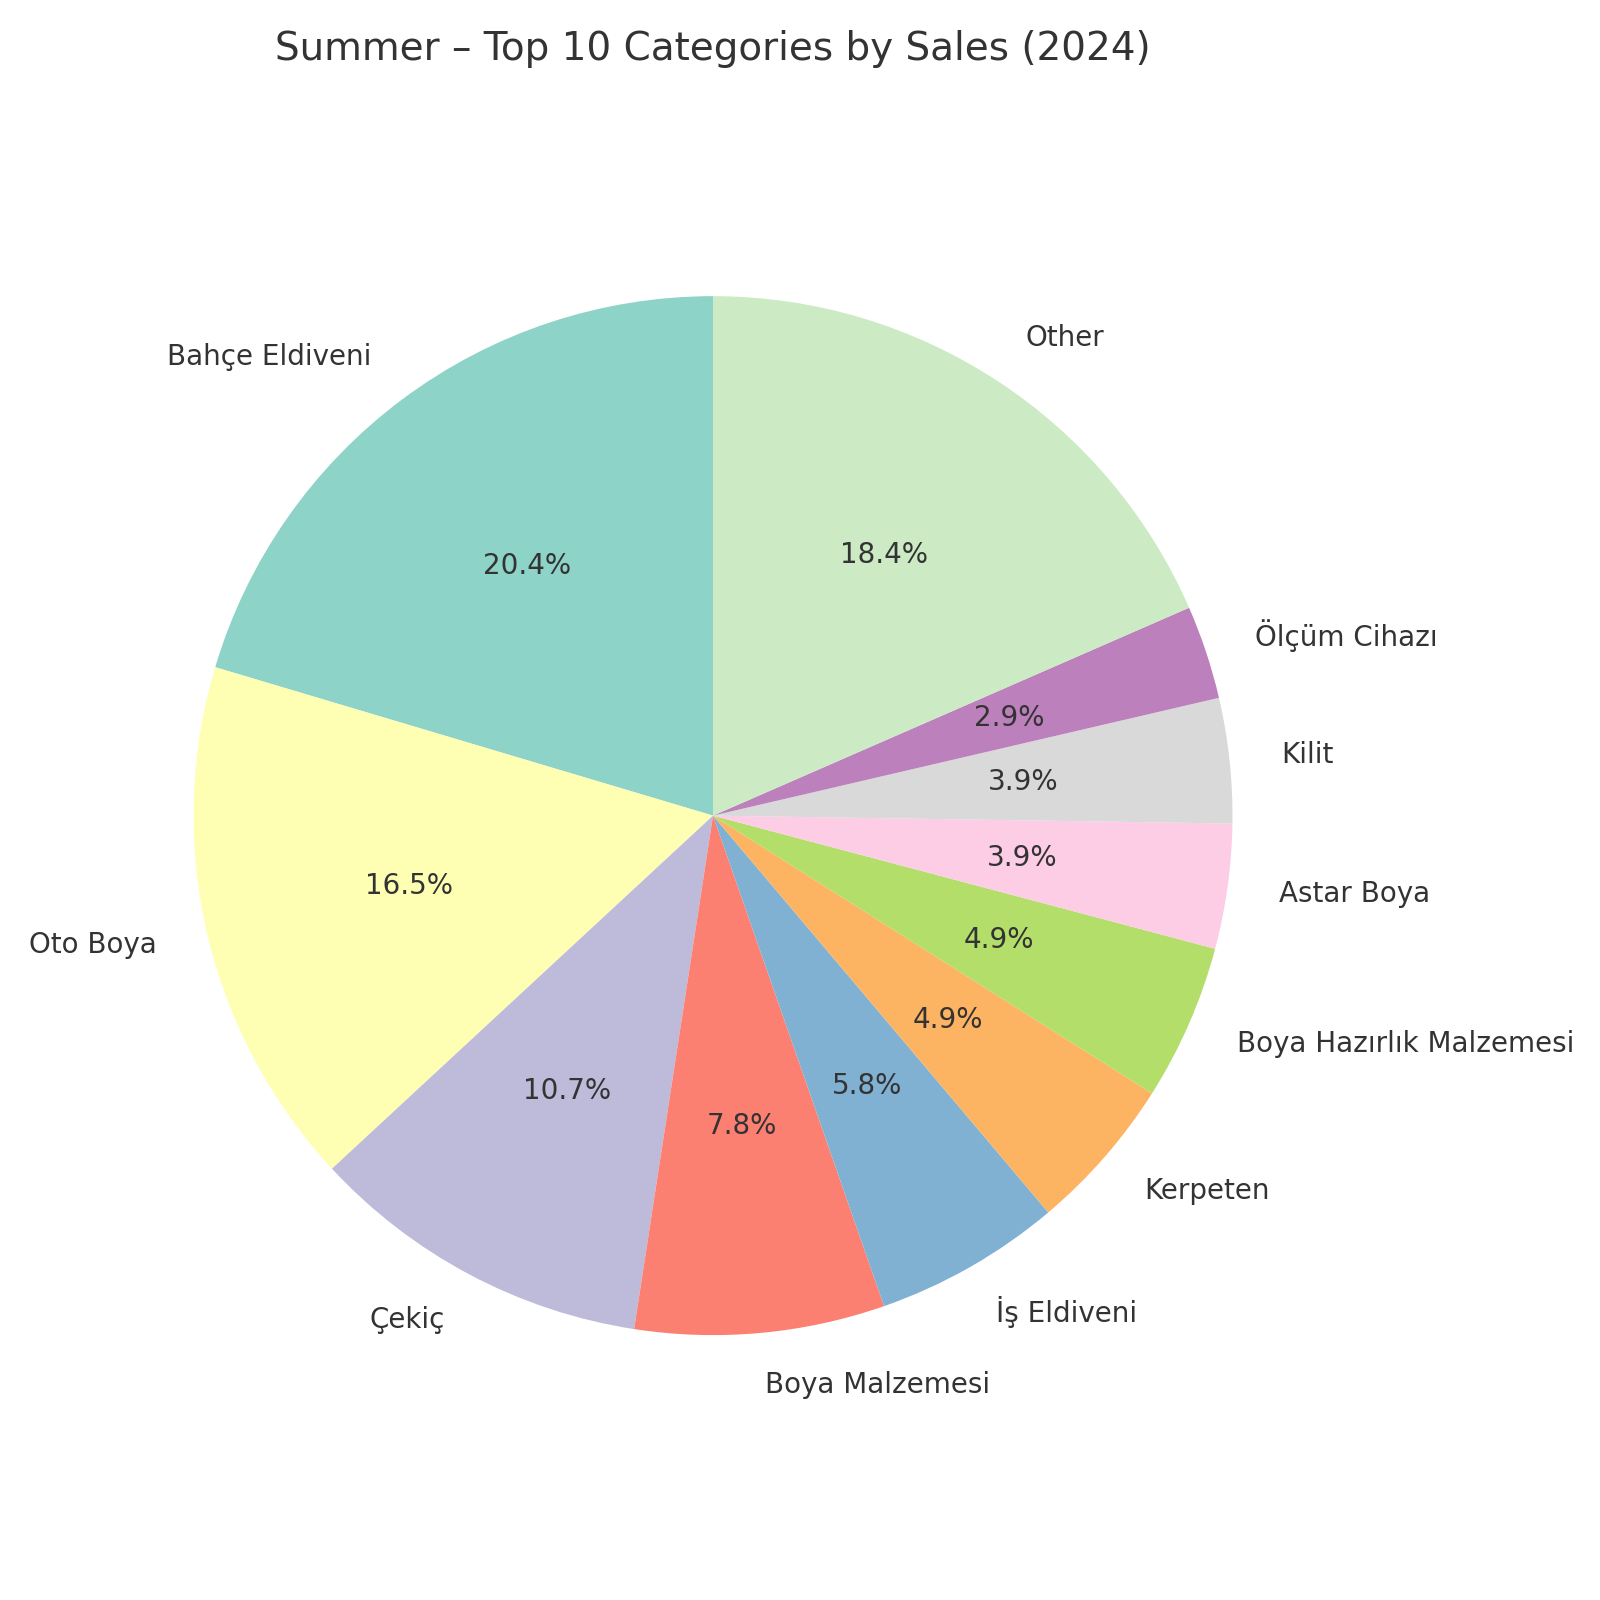

In [ ]:
df_season = df_12ay[df_12ay["Mevsim"] == "Summer"]
cat_sales = df_season.groupby("Kategori")["Net Sats Adedi"].sum().sort_values(ascending=False)

top10 = cat_sales.head(10)
other = cat_sales.iloc[10:].sum()
if other > 0:
    top10["Other"] = other

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

color_cycle = cycle(sns.color_palette("Set3") + sns.color_palette("Paired"))
colors = [next(color_cycle) for _ in range(len(top10))]

plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title("Summer – Top 10 Categories by Sales (2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()

**📝 Notes:**
- The most sold category in Summer was **Bahçe Eldiveni** with **21 units** sold.
- The least sold category (among Top 10) was **Ölçüm Cihazı** with **3 units** sold.

### 🟢 Autumn – Top 10 Categories by Sales

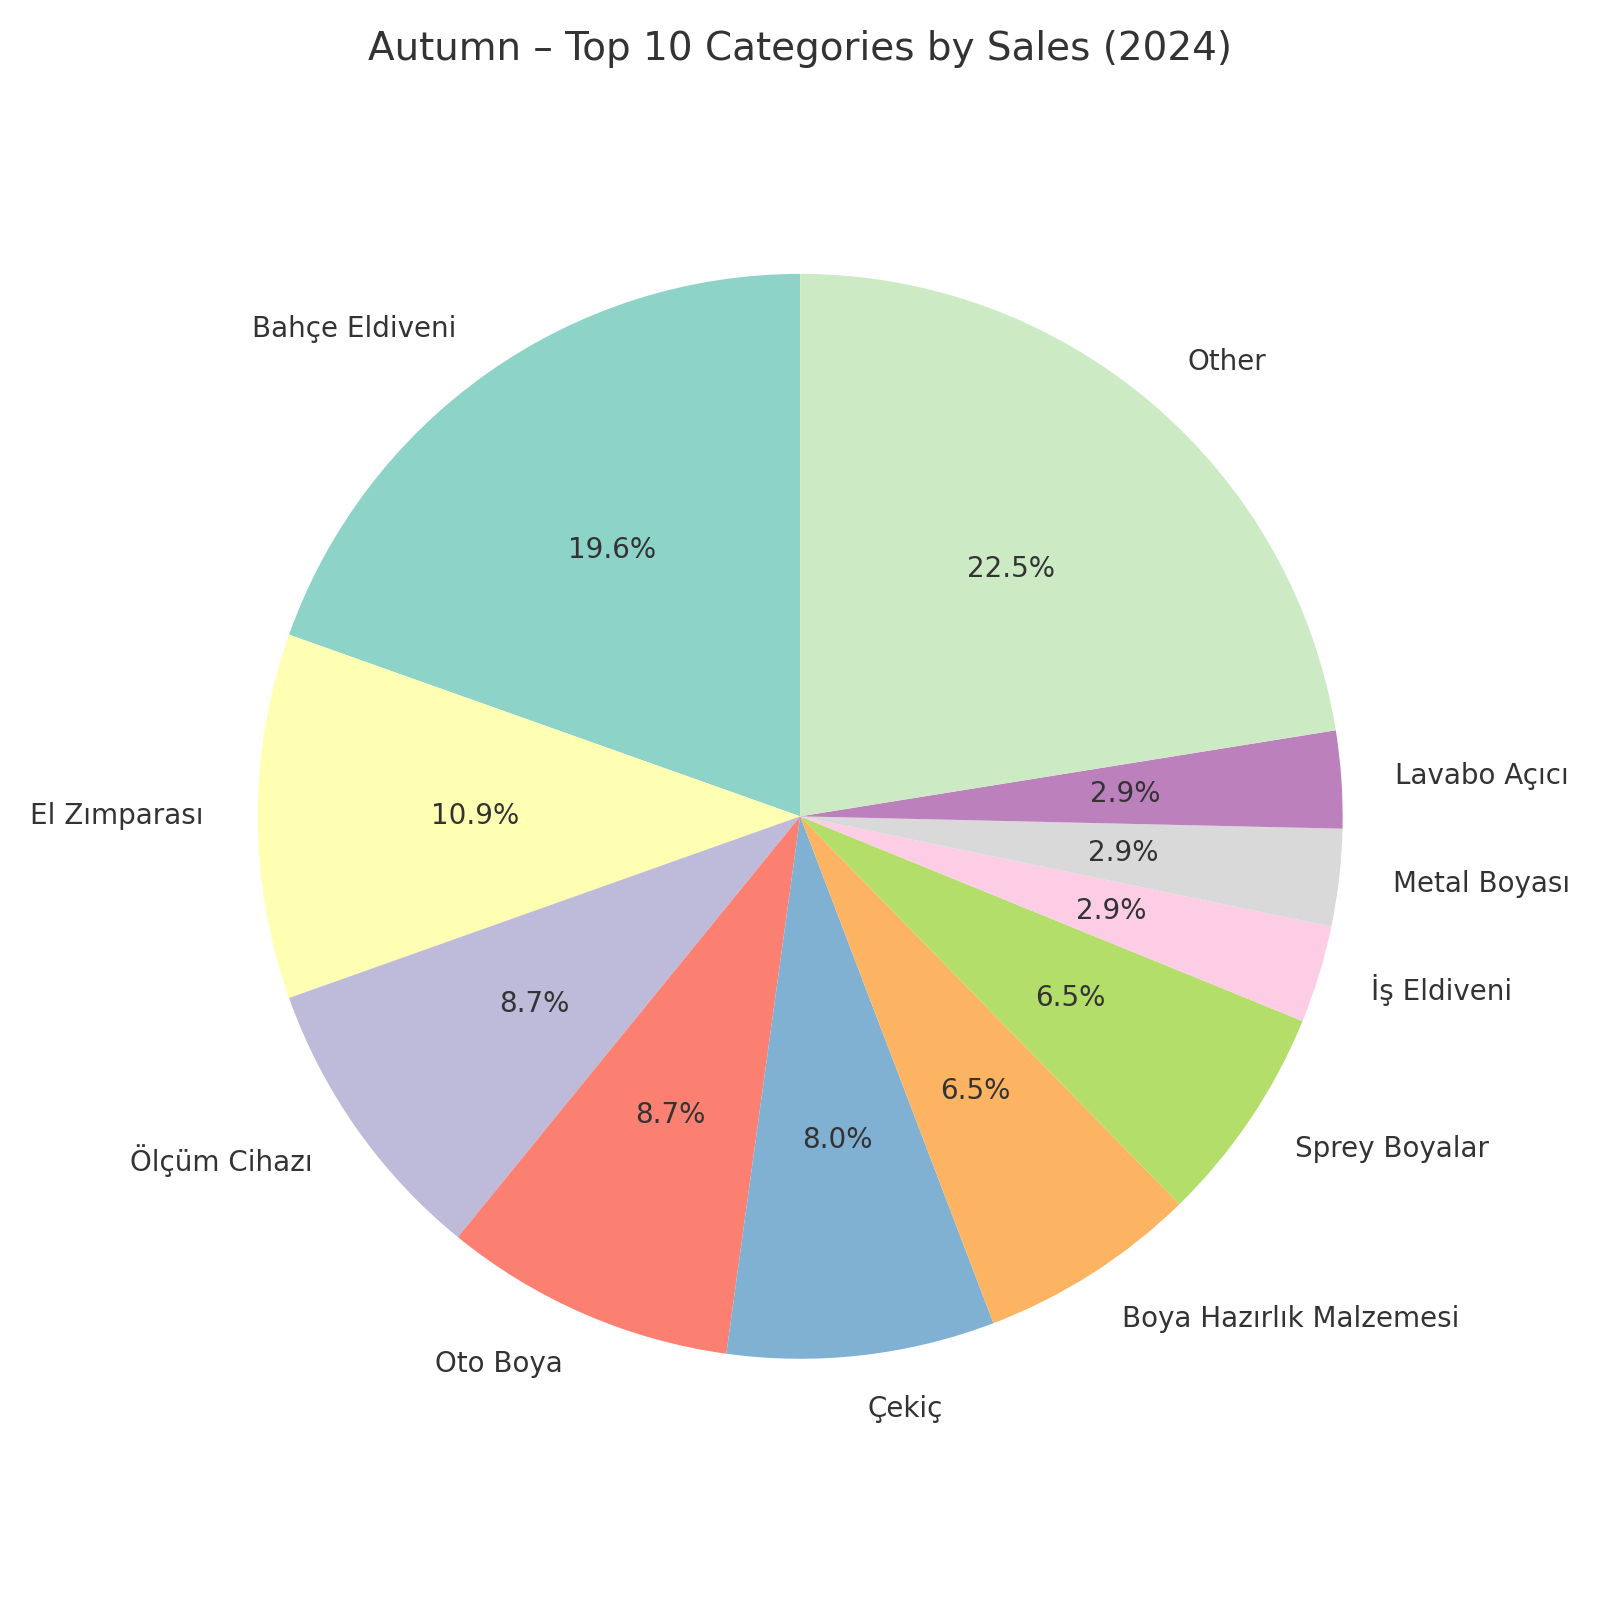

In [ ]:
df_season = df_12ay[df_12ay["Mevsim"] == "Autumn"]
cat_sales = df_season.groupby("Kategori")["Net Sats Adedi"].sum().sort_values(ascending=False)

top10 = cat_sales.head(10)
other = cat_sales.iloc[10:].sum()
if other > 0:
    top10["Other"] = other

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

color_cycle = cycle(sns.color_palette("Set3") + sns.color_palette("Paired"))
colors = [next(color_cycle) for _ in range(len(top10))]

plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title("Autumn – Top 10 Categories by Sales (2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()

**📝 Notes:**
- The most sold category in Autumn was **Bahçe Eldiveni** with **27 units** sold.
- The least sold category (among Top 10) was **İş Eldiveni** with **4 units** sold.

## 🌡️ Seasonal Sales Heatmap – Top 10 Categories

This heatmap shows the distribution of sales across the four seasons for the **top 10 selling categories** in 2024.  
Each cell represents the total number of units sold for a category in a given season.

**Usage:**  
This visualization helps identify **seasonal demand patterns** for different product categories.

**Interpretation:**  
- Darker cells indicate higher sales volume.
- Empty cells (white) indicate no recorded sales for that category in that season.
- For example, **Bahçe Eldiveni (Garden Gloves)** sees high sales in **Summer**, while **İş Eldiveni (Work Gloves)** is prominent in **Winter**.

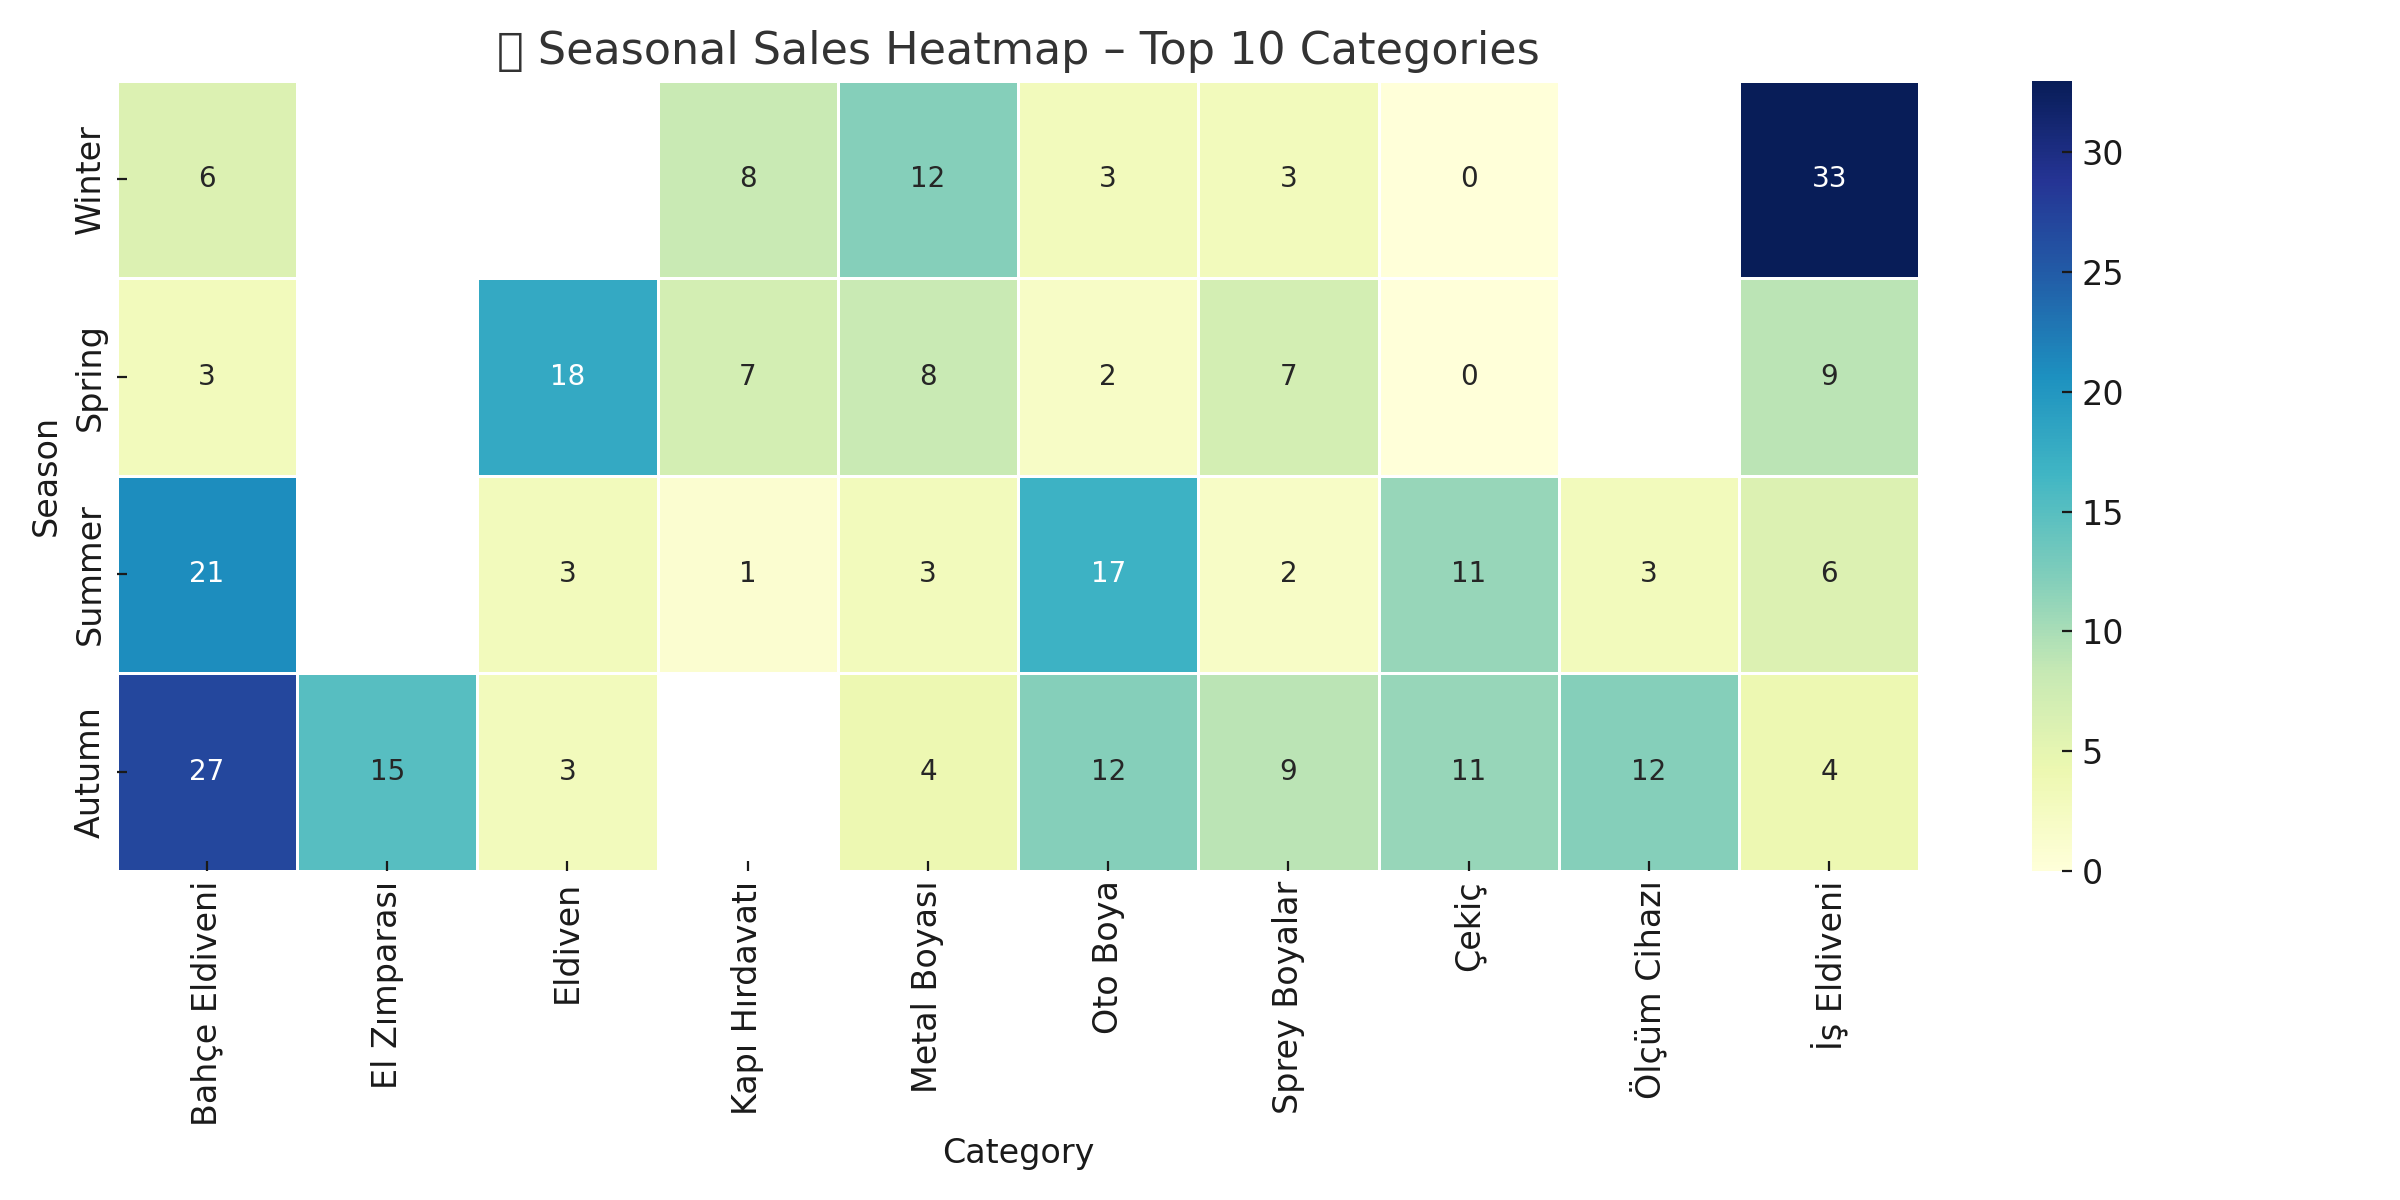

In [ ]:
top10_heatmap_cats = df_12ay.groupby("Kategori")["Net Sats Adedi"].sum().sort_values(ascending=False).head(10).index
heatmap_df = df_12ay[df_12ay["Kategori"].isin(top10_heatmap_cats)]
heatmap_data = heatmap_df.groupby(["Mevsim", "Kategori"])["Net Sats Adedi"].sum().unstack().reindex(index=["Winter", "Spring", "Summer", "Autumn"])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("🌡️ Seasonal Sales Heatmap – Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

## 🧪 Hypothesis Testing

### 🎯 Why ANOVA Was Used

**ANOVA (Analysis of Variance)** is used when we want to determine whether there are any statistically significant differences between the **means of three or more independent groups**.

In this project, we used **One-Way ANOVA** to test whether the average **Net Sales Quantity** is significantly different across **four seasons**:
- Winter
- Spring
- Summer
- Autumn

Since we are comparing **more than two groups**, a t-test is not sufficient. ANOVA allows us to assess whether **at least one group mean** is different from the others.

---

### 📌 Hypothesis

- **H₀ (Null Hypothesis):** The mean sales quantities are the same across all seasons.
- **H₁ (Alternative Hypothesis):** At least one season has a different mean sales quantity.

In [ ]:
from scipy.stats import f_oneway

# Group sales quantities by season
season_order = ["Winter", "Spring", "Summer", "Autumn"]
samples = [df_12ay[df_12ay["Mevsim"] == s]["Net Sats Adedi"].values for s in season_order]

# Perform ANOVA
f_stat, p_val = f_oneway(*samples)

print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_val, 3))

In [ ]:
from scipy.stats import f_oneway

season_order = ["Winter", "Spring", "Summer", "Autumn"]
samples = [df_12ay[df_12ay["Mevsim"] == s]["Net Sats Adedi"].values for s in season_order]

f_stat, p_val = f_oneway(*samples)

print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_val, 3))

### 🧪 Hypothesis Testing – One-Way ANOVA

A one-way ANOVA was conducted to determine whether there is a statistically significant difference  
in sales quantities between the four seasons.

- **F-statistic**: 1.124  
- **p-value**: 0.340  

➡️ **Conclusion:** There is no statistically significant difference between seasons.

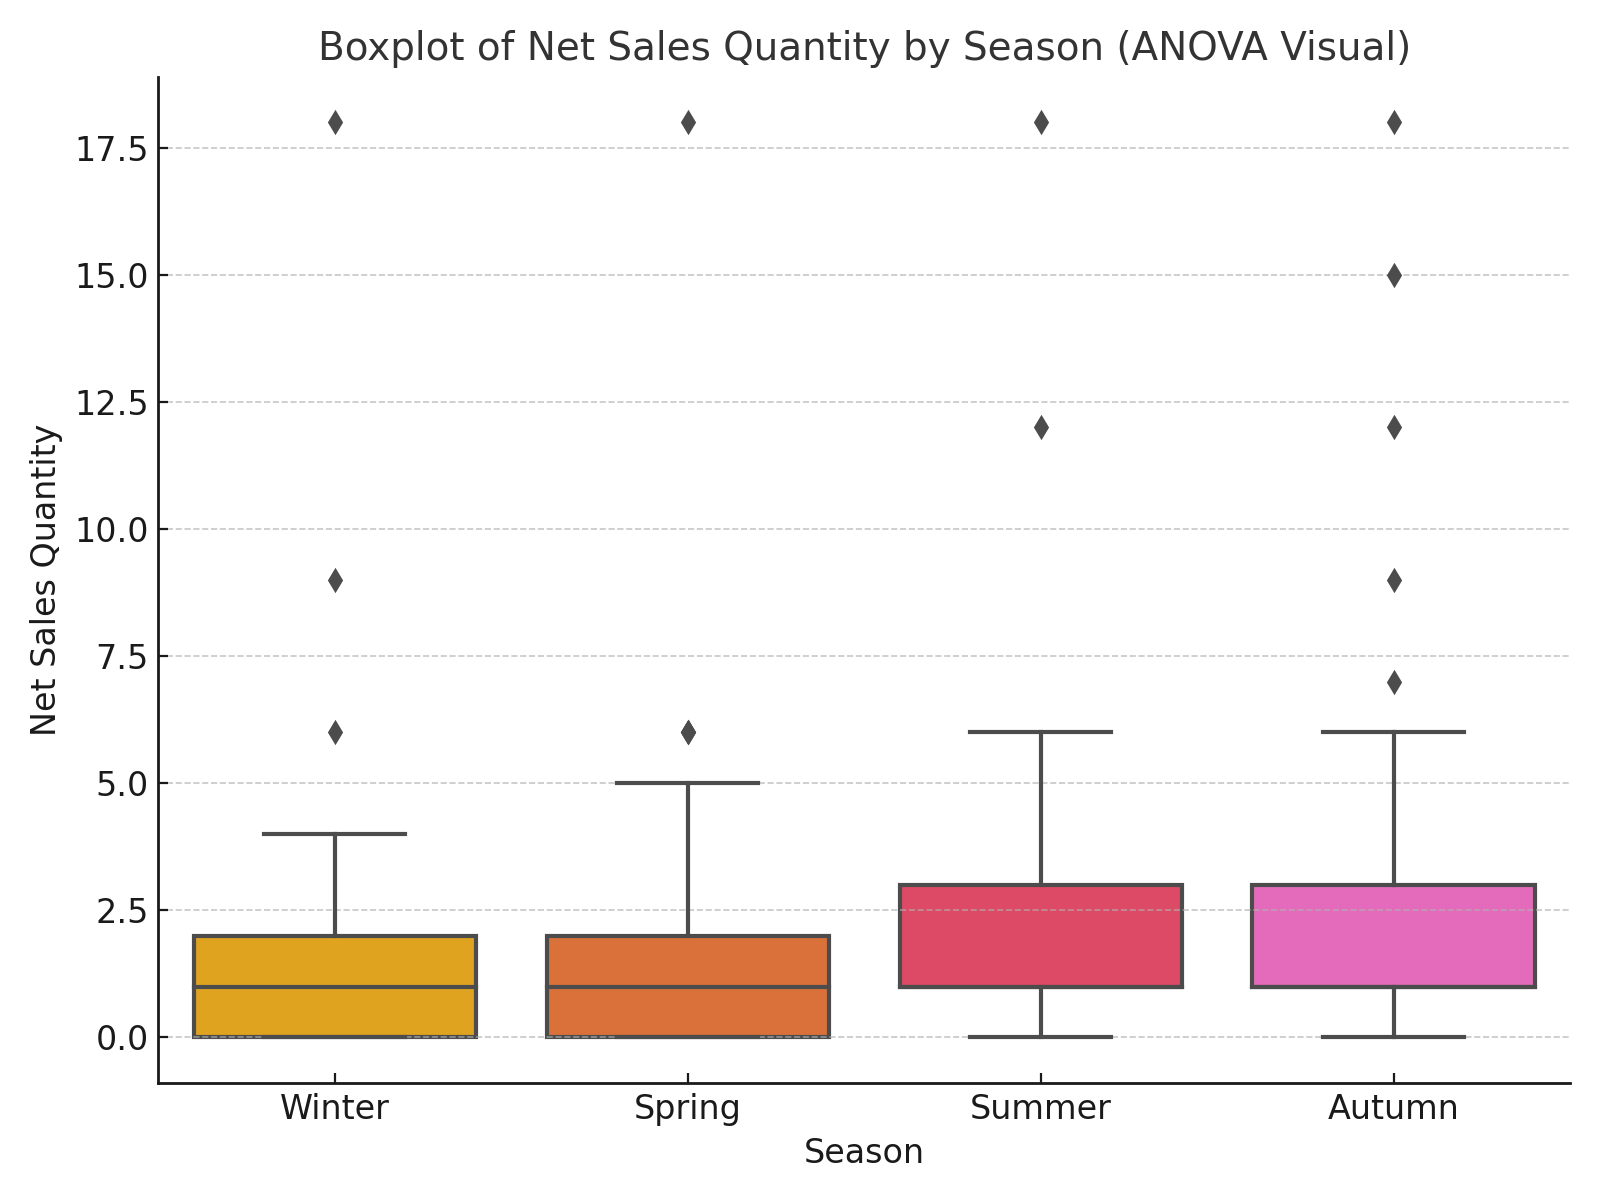

## ✅ Results Summary

This section summarizes the key findings and insights derived from the full-year sales analysis of 2024.

---

### 📈 Monthly Sales Trend
- Sales are relatively stable throughout the year with small fluctuations.
- No major seasonal surge is observed in the monthly overall quantities.

---

### 📊 Seasonal Sales Summary
- **Summer** had the highest total sales volume across all seasons.
- **Spring** and **Winter** followed closely, while **Autumn** showed the lowest total sales.
- Bar charts and heatmaps clearly visualized these season-based differences.

---

### 🥧 Seasonal Category Distributions (Pie Charts)
- Each season has its own dominant category:
  - **Winter:** İş Eldiveni
  - **Spring:** Eldiven
  - **Summer & Autumn:** Bahçe Eldiveni
- The pie charts illustrate which categories contributed the most to seasonal sales.

---

### 🌡️ Heatmap – Top 10 Categories
- Heatmap revealed that some categories are clearly season-dependent.
  - For example, **Bahçe Eldiveni** peaked in Summer.
  - **İş Eldiveni** was dominant in Winter.
- Categories like Ölçüm Cihazı and Zımpara had low year-round sales.

---

### 🧪 Hypothesis Testing (ANOVA)
- One-way ANOVA was used to test if mean sales differ significantly between seasons.
- **Result:** F = 1.124, p = 0.340
- **Conclusion:** There is no statistically significant difference in mean sales across the seasons.

---

### 🎯 Insight
Despite observable differences in total seasonal sales, the average per-record sales quantity does **not** vary significantly across seasons, indicating consistent product performance.